<a href="https://colab.research.google.com/github/rishabhrrk/handgesture/blob/master/HandGestureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3: Rishabh Khanna, Abubakr Omar, Easwar Prabakaran

Importing All libraries and modules

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer

Import the datasets from the Github

In [ ]:
training0 = pd.read_csv("https://raw.githubusercontent.com/rishabhrrk/bme_team3_datascience/main/0.csv", header=None )
training1 = pd.read_csv("https://raw.githubusercontent.com/rishabhrrk/bme_team3_datascience/main/1.csv", header=None )
training2 = pd.read_csv("https://raw.githubusercontent.com/rishabhrrk/bme_team3_datascience/main/2.csv", header=None )
training3 = pd.read_csv("https://raw.githubusercontent.com/rishabhrrk/bme_team3_datascience/main/3.csv", header=None )

Combine the datasets together

In [ ]:
combine = [training0, training1, training2, training3]

In [ ]:
datasetandidentifier = pd.concat(combine)

Move the last column of the dataset into it's own matrix since it shows the identity of each gesture

In [ ]:
dataset = datasetandidentifier.loc[:,0:63]

In [ ]:
identifier = datasetandidentifier[64]

Split the dataset and identification matrices into training and testing sets. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, identifier, 
                                                    test_size=0.20,
                                                    stratify=identifier,
                                                    random_state=1)

# K-Nearest Neighbor Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#create new a knn model


knn2 = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])


#create a dictionary of all values we want to teset for n_neighbors
param_grid = {'knn__n_neighbors':np.arange(5,20)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             

In [ ]:
#Check the best n_neighbors value
knn_gscv. best_params_

{'knn__n_neighbors': 5}

In [ ]:
#the accuracy of the model
knn_gscv.best_score_

0.6597083443071602

Create the testing and validation curves

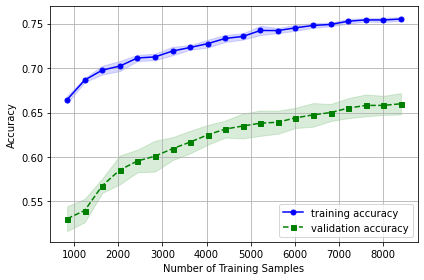

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



train_sizes, train_scores, test_scores =\
learning_curve(estimator = knn_gscv.best_estimator_,
               X = X_train,
               y= y_train,
               train_sizes=np.linspace(0.1, 1.0, 20),
               cv = 10,
               n_jobs=-1)

train_mean=np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
test_mean = np. mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label = 'training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = .15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean +test_std, 
                 test_mean - test_std, 
                 alpha=.15, color='green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.ylim([0.7,1])
plt.tight_layout()
plt.show()

Create a confusion matrix

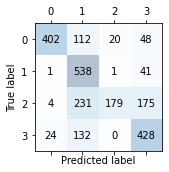

In [ ]:
from sklearn.metrics import confusion_matrix

knn_gscv.best_estimator_.fit(X_train, y_train)
y_pred = knn_gscv.best_estimator_.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred=y_pred)
fig,ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

The Precision and Sensitivity

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred, average = 'macro'))


Precision: 0.744
Sensitivity: 0.663




---



# Neural Network Model

Pre processing for Neural Network (slightly different from the previous model)

In [ ]:
sc = StandardScaler()
class_le = LabelBinarizer()
x_train = pd.DataFrame(sc.fit_transform(X_train))
x_test = pd.DataFrame(sc.fit_transform(X_test))
y_train_nn = (class_le.fit_transform(y_train))

Building Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=64, input_dim=64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=4, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',metrics.categorical_accuracy])

Training Model

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x_train, y_train_nn, epochs=150, batch_size=10, validation_split= 0.3,callbacks = [earlystop])

Epoch 1/150
654/654 [==============================] - 2s 4ms/step - loss: 0.4859 - accuracy: 0.4641 - categorical_accuracy: 0.4641 - val_loss: 0.3211 - val_accuracy: 0.7763 - val_categorical_accuracy: 0.7763
Epoch 2/150
654/654 [==============================] - 2s 3ms/step - loss: 0.2260 - accuracy: 0.8491 - categorical_accuracy: 0.8491 - val_loss: 0.1764 - val_accuracy: 0.8773 - val_categorical_accuracy: 0.8773
Epoch 3/150
654/654 [==============================] - 2s 3ms/step - loss: 0.1228 - accuracy: 0.9241 - categorical_accuracy: 0.9241 - val_loss: 0.1359 - val_accuracy: 0.9030 - val_categorical_accuracy: 0.9030
Epoch 4/150
654/654 [==============================] - 2s 3ms/step - loss: 0.0843 - accuracy: 0.9466 - categorical_accuracy: 0.9466 - val_loss: 0.1204 - val_accuracy: 0.9126 - val_categorical_accuracy: 0.9126
Epoch 5/150
654/654 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9607 - categorical_accuracy: 0.9607 - val_loss: 0.1160 - val_accurac

Evaluating Model

In [ ]:
scores = model.evaluate(x_test, (class_le.fit_transform(y_test)))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred_nn = model.predict(x_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_nn, average = 'macro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred_nn, average = 'macro'))

73/73 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9336 - categorical_accuracy: 0.9336
accuracy: 93.36%
Precision: 0.934
Sensitivity: 0.934


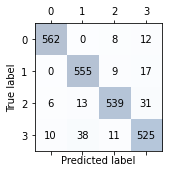

In [ ]:
confmat = confusion_matrix(y_test, y_pred_nn)
fig,ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

### Diagnosis Learning Curve

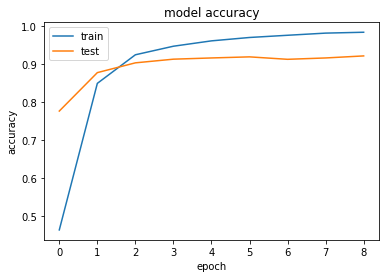

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---



# Random Forest Model

Building and Training Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=1)
param_dist = {"max_depth": [3,6,12,24,48,96],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ['entropy','gini']}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, cv = 5, verbose=2, n_jobs = -1)
rf_random.fit(x_train, y_train)
print(rf_random.best_params_)
y_pred_rf = rf_random.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.4s finished


{'criterion': 'entropy', 'max_depth': 96, 'max_features': 5, 'min_samples_leaf': 1}


Evaluating Model

In [ ]:
scores = rf_random.score(x_test, y_test)
print(scores)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_rf, average = 'macro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred_rf, average = 'macro'))

0.9233732876712328
Precision: 0.923
Sensitivity: 0.923


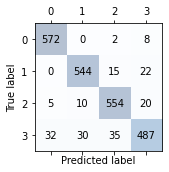

In [ ]:
confmat = confusion_matrix(y_test, y_pred_rf)
fig,ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

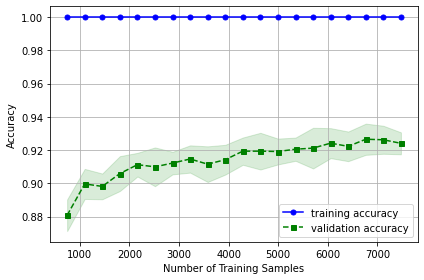

In [ ]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator = rf_random.best_estimator_,
               X =  x_train,
               y= y_train,
               train_sizes=np.linspace(0.1, 1.0, 20),
               cv = 5,
               n_jobs=-1)

train_mean=np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
test_mean = np. mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label = 'training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = .15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean +test_std, 
                 test_mean - test_std, 
                 alpha=.15, color='green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.ylim([0.7,1])
plt.tight_layout()
plt.show()